<a href="https://colab.research.google.com/github/Asdroad/SignalExchange/blob/main/Lenet_mnist_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import time
import torch
import random
import numpy as np
import torchvision.datasets
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt


random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

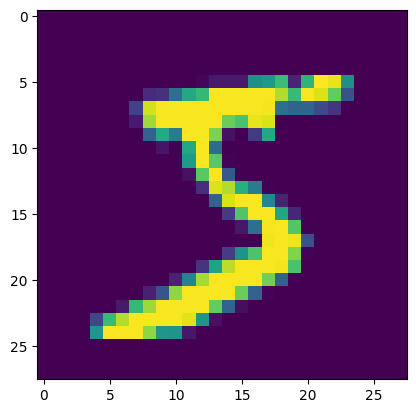

tensor(5)


In [17]:
plot.imshow(X_train[0, :, :])
plot.show()
print(y_train[0])

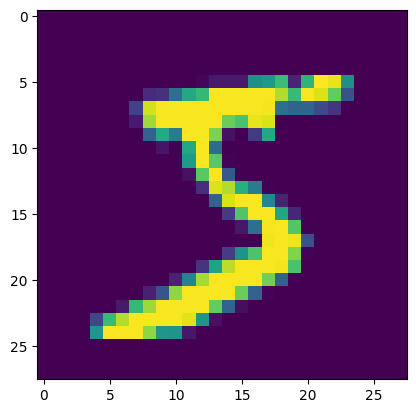

tensor(5)


In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [19]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [20]:
conv_kernel = 5         # Размер ядра свертки
pool_kernel = 2         # Размер ядра для операции пуллинга
pool_stride = 2         # Шаг пуллинга

conv1_in = 1            # Количество входных каналов (глубина изображения, 1 для ч/б)
conv1_pad = 2           # Паддинг в первом сверточном слое
conv1_out = 8           # Количество фильтров в первом сверточном слое

conv2_out = 64          # Количество фильтров во втором сверточном слое

fc1_out = 160           # Количество нейронов в первом полносвязном слое
fc2_out = 100           # Количество нейронов во втором полносвязном слое

class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=conv1_in, out_channels=conv1_out, kernel_size=conv_kernel, padding=conv1_pad) # [1, 8, 28, 28]
        self.act1 = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=pool_kernel, stride=pool_stride) # [1, 8, 14, 14]

        self.conv2 = torch.nn.Conv2d(in_channels=conv1_out, out_channels=conv2_out, kernel_size=conv_kernel, padding=0) # [1, 64, 10, 10]
        self.act2 = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=pool_kernel, stride=pool_stride) # [1, 64, 5, 5]

        self.fc1 = torch.nn.Linear(conv2_out * conv_kernel ** 2, fc1_out) # [1, 160]
        self.act3 = torch.nn.ReLU()

        self.fc2 = torch.nn.Linear(fc1_out, fc2_out) # [1, 100]
        self.act4 = torch.nn.ReLU()

        self.fc3 = torch.nn.Linear(fc2_out, 10) # [1, 10]

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5 = LeNet5()

In [21]:
device = torch.device('cuda:0')
lenet5 = lenet5.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=0.001)

In [22]:
batch_size = 512

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

start = time.time()

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu().item()
    test_accuracy_history.append(accuracy)

    print(f"Эпоха: {epoch + 1} Точность: {accuracy:.4f}")

print(f'Обучение прошло за {(time.time() - start):.2f} секунд')

Эпоха: 1 Точность: 0.9787
Эпоха: 2 Точность: 0.9833
Эпоха: 3 Точность: 0.9890
Эпоха: 4 Точность: 0.9909
Эпоха: 5 Точность: 0.9860
Эпоха: 6 Точность: 0.9897
Эпоха: 7 Точность: 0.9910
Эпоха: 8 Точность: 0.9905
Эпоха: 9 Точность: 0.9912
Эпоха: 10 Точность: 0.9913
Эпоха: 11 Точность: 0.9911
Эпоха: 12 Точность: 0.9899
Эпоха: 13 Точность: 0.9912
Эпоха: 14 Точность: 0.9897
Эпоха: 15 Точность: 0.9903
Эпоха: 16 Точность: 0.9905
Эпоха: 17 Точность: 0.9915
Эпоха: 18 Точность: 0.9906
Эпоха: 19 Точность: 0.9898
Эпоха: 20 Точность: 0.9907
Эпоха: 21 Точность: 0.9893
Эпоха: 22 Точность: 0.9892
Эпоха: 23 Точность: 0.9910
Эпоха: 24 Точность: 0.9925
Эпоха: 25 Точность: 0.9913
Эпоха: 26 Точность: 0.9925
Эпоха: 27 Точность: 0.9900
Эпоха: 28 Точность: 0.9914
Эпоха: 29 Точность: 0.9909
Эпоха: 30 Точность: 0.9918
Эпоха: 31 Точность: 0.9929
Эпоха: 32 Точность: 0.9933
Эпоха: 33 Точность: 0.9909
Эпоха: 34 Точность: 0.9898
Эпоха: 35 Точность: 0.9911
Эпоха: 36 Точность: 0.9929
Эпоха: 37 Точность: 0.9926
Эпоха: 38 

In [23]:
lenet5.forward(X_test)

tensor([[-22.9062, -14.6185,  -6.7319,  ...,  39.2598, -12.3231, -15.3528],
        [ -7.9600,  -9.2953,  55.8996,  ..., -11.5886, -15.9650, -38.1855],
        [ -7.6801,  27.8110,  -3.8749,  ...,   0.1639,  -2.9219, -10.8568],
        ...,
        [-31.1455,  -4.7109, -17.2816,  ...,  -8.7547,  -4.8933,  -4.0655],
        [-10.7502,  -8.0782,  -8.1142,  ..., -12.4454,   9.0721, -13.2535],
        [ -0.1489,  -5.8759,  -5.6629,  ..., -27.9453, -11.6302,  -8.0466]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [24]:
print(f'Max accuracy: {max(test_accuracy_history):.4f}')

Max accuracy: 0.9941


Text(0, 0.5, 'Значение функции потерь')

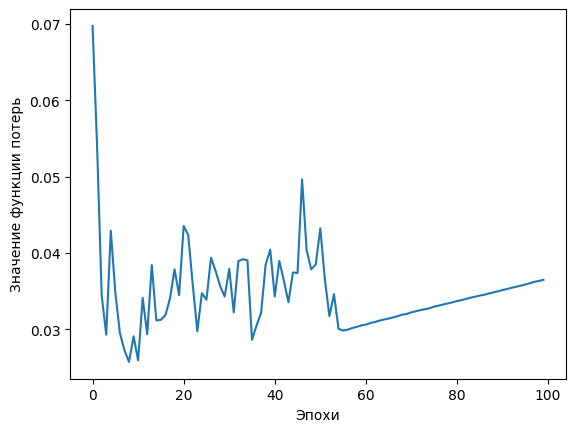

In [25]:
plot.plot(test_loss_history)
plot.xlabel("Эпохи")
plot.ylabel("Значение функции потерь")

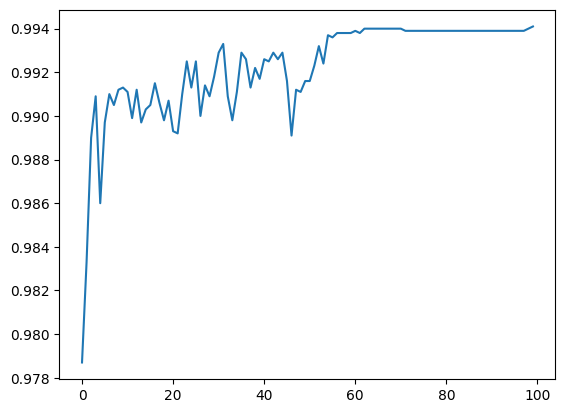

In [26]:
plot.plot(test_accuracy_history);

Запуск 1: Полносвязная сеть
Обучение Полносвязная сеть
Полносвязная сеть - Эпоха 1: Точность на обучении = 0.7425, Точность на тесте = 0.7472
Полносвязная сеть - Эпоха 2: Точность на обучении = 0.8129, Точность на тесте = 0.8181
Полносвязная сеть - Эпоха 3: Точность на обучении = 0.8418, Точность на тесте = 0.8479
Полносвязная сеть - Эпоха 4: Точность на обучении = 0.8619, Точность на тесте = 0.8665
Полносвязная сеть - Эпоха 5: Точность на обучении = 0.8744, Точность на тесте = 0.8775
Полносвязная сеть - Эпоха 6: Точность на обучении = 0.8851, Точность на тесте = 0.8880
Полносвязная сеть - Эпоха 7: Точность на обучении = 0.8908, Точность на тесте = 0.8932
Полносвязная сеть - Эпоха 8: Точность на обучении = 0.8964, Точность на тесте = 0.8982
Полносвязная сеть - Эпоха 9: Точность на обучении = 0.9017, Точность на тесте = 0.8995
Полносвязная сеть - Эпоха 10: Точность на обучении = 0.9054, Точность на тесте = 0.9028
Полносвязная сеть - Эпоха 11: Точность на обучении = 0.9086, Точность на т

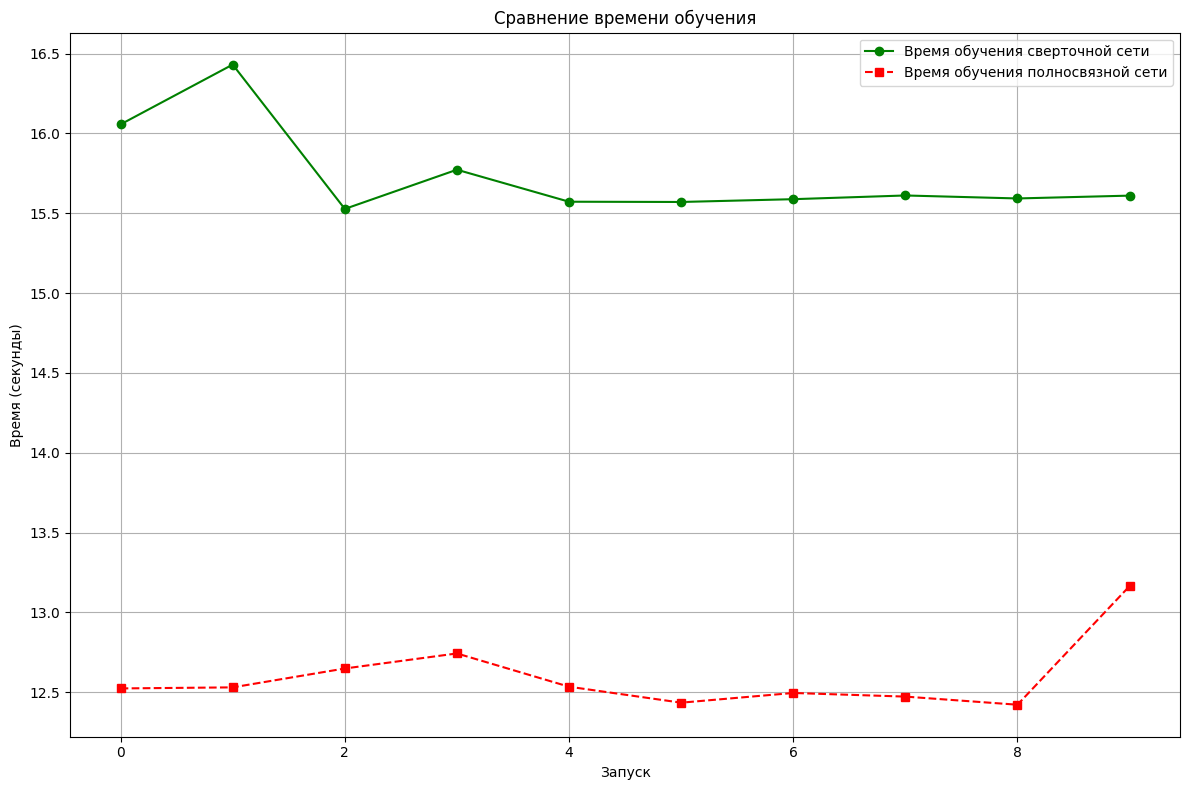

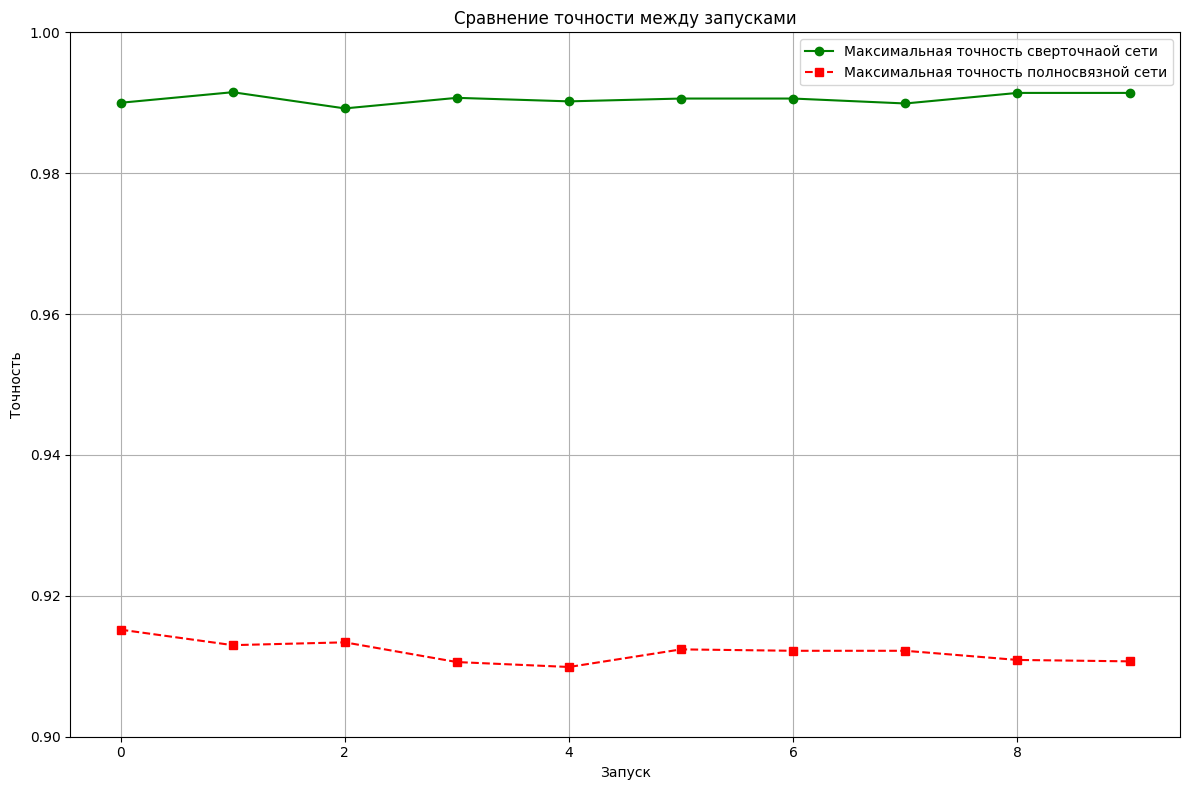


Анализ:
- Анализ переобучения:
Запуск 1 (Полносвязная сеть): Разница переобучения = 0.0022
Запуск 2 (Полносвязная сеть): Разница переобучения = 0.0026
Запуск 3 (Полносвязная сеть): Разница переобучения = 0.0029
Запуск 4 (Полносвязная сеть): Разница переобучения = 0.0062
Запуск 5 (Полносвязная сеть): Разница переобучения = 0.0061
Запуск 6 (Полносвязная сеть): Разница переобучения = 0.0025
Запуск 7 (Полносвязная сеть): Разница переобучения = 0.0039
Запуск 8 (Полносвязная сеть): Разница переобучения = 0.0027
Запуск 9 (Полносвязная сеть): Разница переобучения = 0.0062
Запуск 10 (Полносвязная сеть): Разница переобучения = 0.0041
Запуск 1 (Сверточная сеть): Разница переобучения = 0.0095
Запуск 2 (Сверточная сеть): Разница переобучения = 0.0082
Запуск 3 (Сверточная сеть): Разница переобучения = 0.0100
Запуск 4 (Сверточная сеть): Разница переобучения = 0.0087
Запуск 5 (Сверточная сеть): Разница переобучения = 0.0094
Запуск 6 (Сверточная сеть): Разница переобучения = 0.0083
Запуск 7 (Сверточна

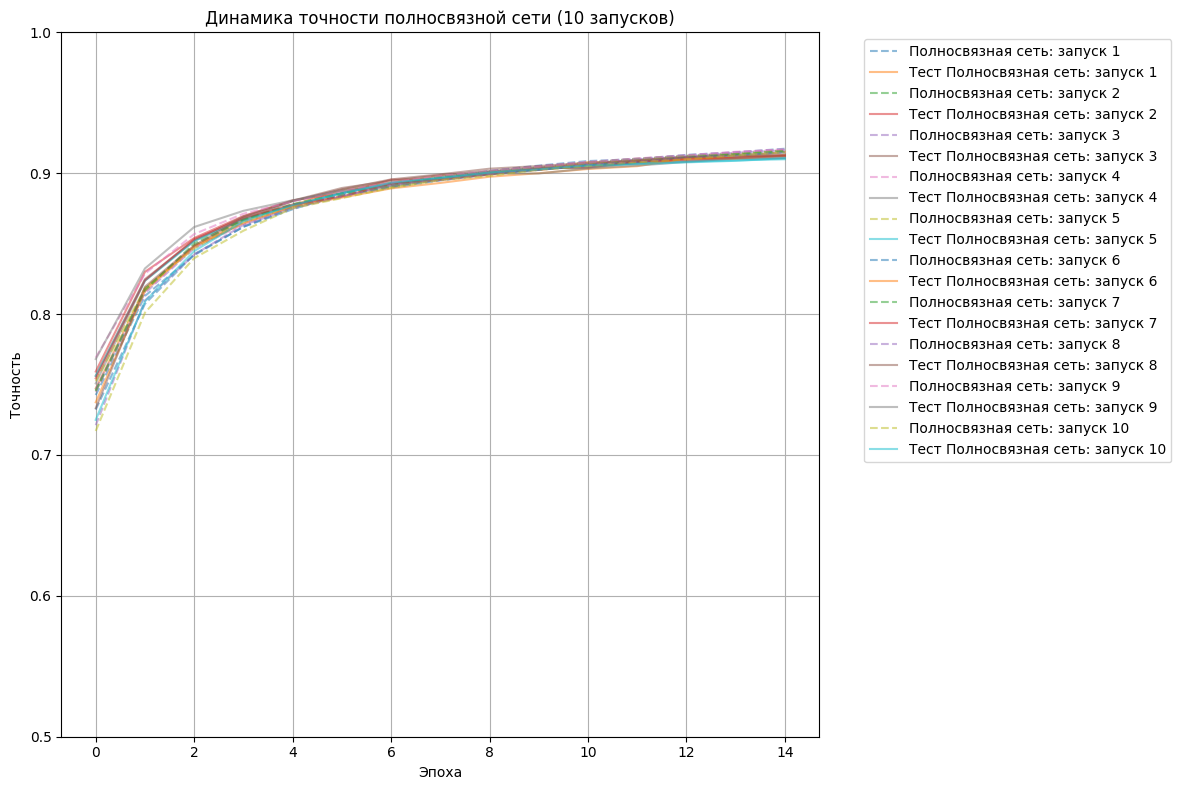

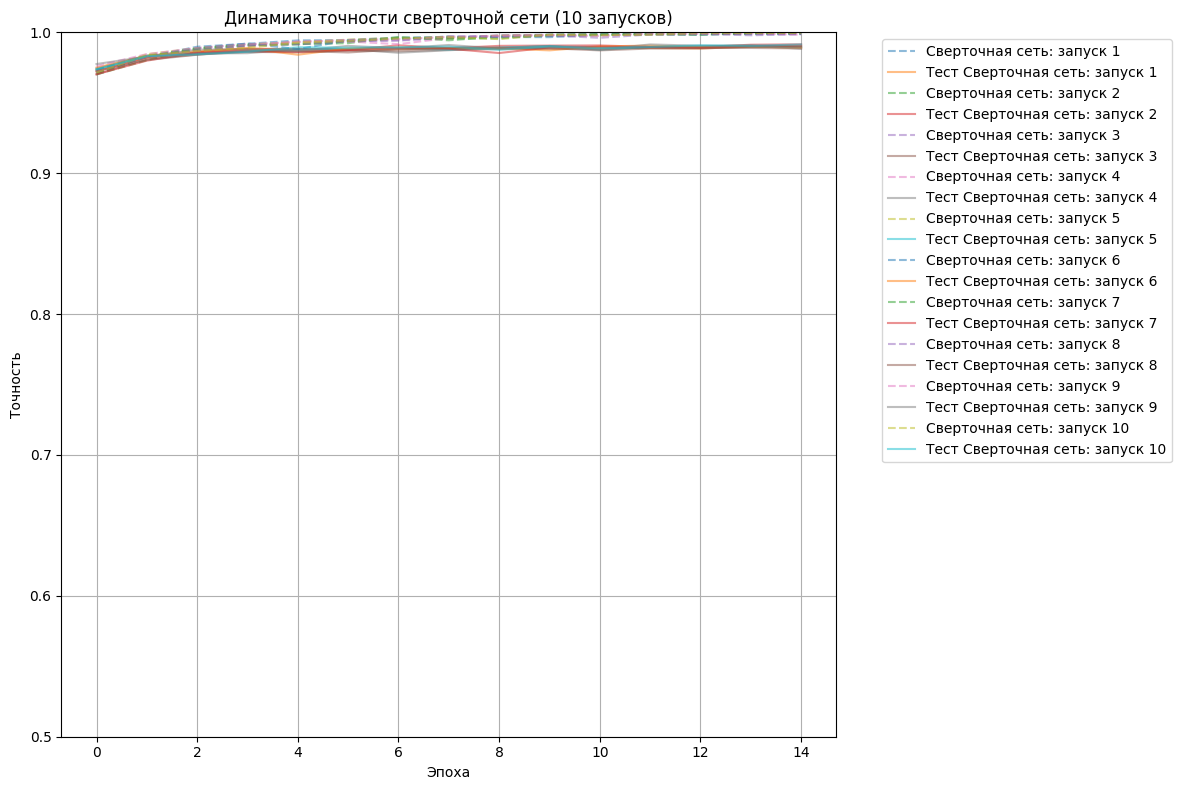

In [11]:
import time
import torch
import random
import numpy as np
import torchvision.datasets
import matplotlib.pyplot as plt

device = torch.device('cuda:0')

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

X_train_LeNet = X_train.unsqueeze(1).float()
X_test_LeNet = X_test.unsqueeze(1).float()
X_train_MNIST = X_train.float().reshape([-1, 28 * 28])
X_test_MNIST = X_test.float().reshape([-1, 28 * 28])

class Net(torch.nn.Module):
    def __init__(self, n_hidden_neurons=100):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=64, kernel_size=5)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = torch.nn.Linear(5 * 5 * 64, 160)
        self.act3 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(160, 100)
        self.act4 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        return x

def train_model(model_class, batch_size, X_test, y_test, X_train, y_train, optimizer_type, lr, model_name):
    model = model_class()
    model = model.to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = optimizer_type(model.parameters(), lr=lr)
    test_accuracy_history = []
    train_accuracy_history = []

    print(f"Обучение {model_name}")
    start_time = time.time()

    for epoch in range(15):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index + batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            preds = model.forward(X_batch)
            loss_value = loss_fn(preds, y_batch)
            loss_value.backward()
            optimizer.step()

        with torch.no_grad():
            test_preds = model.forward(X_test)
            test_accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(test_accuracy)

            train_preds = model.forward(X_train.to(device))
            train_accuracy = (train_preds.argmax(dim=1) == y_train.to(device)).float().mean().item()
            train_accuracy_history.append(train_accuracy)

        print(f"{model_name} - Эпоха {epoch + 1}: Точность на обучении = {train_accuracy:.4f}, Точность на тесте = {test_accuracy:.4f}")

    elapsed_time = time.time() - start_time
    print(f"Обучение {model_name} завершено за {elapsed_time:.2f} секунд\n")

    return {
        "max_test_accuracy": max(test_accuracy_history),
        "train_accuracy_history": train_accuracy_history,
        "test_accuracy_history": test_accuracy_history,
        "training_time": elapsed_time
    }

accuracy_LeNet = []
accuracy_fc = []
lenet_metrics = []
fc_metrics = []

for i in range(10):
    print(f"Запуск {i + 1}: Полносвязная сеть")
    fc_result = train_model(Net, 100, X_test_MNIST.to(device), y_test.to(device), X_train_MNIST, y_train, torch.optim.SGD, 1e-3, "Полносвязная сеть")
    accuracy_fc.append(fc_result["max_test_accuracy"])
    fc_metrics.append(fc_result)

    print(f"Запуск {i + 1}: Сверточная сеть")
    lenet_result = train_model(LeNet5, 512, X_test_LeNet.to(device), y_test.to(device), X_train_LeNet, y_train, torch.optim.Adam, 1e-3, "Сверточная сеть")
    accuracy_LeNet.append(lenet_result["max_test_accuracy"])
    lenet_metrics.append(lenet_result)

fc_mean = np.mean(accuracy_fc)
fc_std = np.std(accuracy_fc)
lenet_mean = np.mean(accuracy_LeNet)
lenet_std = np.std(accuracy_LeNet)

print(f"Полносвязная сеть: Средняя точность = {fc_mean:.4f}, Стандартное отклонение = {fc_std:.4f}")
print(f"Сверточная сеть: Средняя точность = {lenet_mean:.4f}, Стандартное отклонение = {lenet_std:.4f}")

plt.figure(figsize=(12, 8))
plt.plot([metrics["training_time"] for metrics in lenet_metrics], label="Время обучения сверточной сети", linestyle='-', color='green', marker='o')
plt.plot([metrics["training_time"] for metrics in fc_metrics], label="Время обучения полносвязной сети", linestyle='--', color='red', marker='s')
plt.title("Сравнение времени обучения")
plt.xlabel("Запуск")
plt.ylabel("Время (секунды)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(accuracy_LeNet, label="Максимальная точность сверточнаой сети", linestyle='-', color='green', marker='o')
plt.plot(accuracy_fc, label="Максимальная точность полносвязной сети", linestyle='--', color='red', marker='s')
plt.title("Сравнение точности между запусками")
plt.xlabel("Запуск")
plt.ylabel("Точность")
plt.ylim(0.9, 1.0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nАнализ:")
print("- Анализ переобучения:")
for i, metrics in enumerate(fc_metrics):
    overfit_diff = max(metrics["train_accuracy_history"]) - max(metrics["test_accuracy_history"])
    print(f"Запуск {i + 1} (Полносвязная сеть): Разница переобучения = {overfit_diff:.4f}")
for i, metrics in enumerate(lenet_metrics):
    overfit_diff = max(metrics["train_accuracy_history"]) - max(metrics["test_accuracy_history"])
    print(f"Запуск {i + 1} (Сверточная сеть): Разница переобучения = {overfit_diff:.4f}")

print("- Анализ дисперсии:")
print(f"Стандартное отклонение точности (Полносвязная сеть): {fc_std:.4f}")
print(f"Стандартное отклонение точности (Сверточная сеть): {lenet_std:.4f}")

print("- Рекомендации:")
print("Для сравнения архитектур необходимо выполнить минимум 5-10 запусков, чтобы снизить влияние дисперсии на результаты.")

train_accuracies_per_run_fc = [metrics["train_accuracy_history"] for metrics in fc_metrics]
test_accuracies_per_run_fc = [metrics["test_accuracy_history"] for metrics in fc_metrics]

train_accuracies_per_run_lenet = [metrics["train_accuracy_history"] for metrics in lenet_metrics]
test_accuracies_per_run_lenet = [metrics["test_accuracy_history"] for metrics in lenet_metrics]

plt.figure(figsize=(12, 8))

for i in range(10):
    plt.plot(train_accuracies_per_run_fc[i], label=f"Полносвязная сеть: запуск {i+1}", linestyle='--', alpha=0.5)
    plt.plot(test_accuracies_per_run_fc[i], label=f"Тест Полносвязная сеть: запуск {i+1}", linestyle='-', alpha=0.5)

plt.title("Динамика точности полносвязной сети (10 запусков)")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.ylim(0.5, 1.0)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

for i in range(10):
    plt.plot(train_accuracies_per_run_lenet[i], label=f"Сверточная сеть: запуск {i+1}", linestyle='--', alpha=0.5)
    plt.plot(test_accuracies_per_run_lenet[i], label=f"Тест Сверточная сеть: запуск {i+1}", linestyle='-', alpha=0.5)

plt.title("Динамика точности сверточной сети (10 запусков)")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.ylim(0.5, 1.0)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

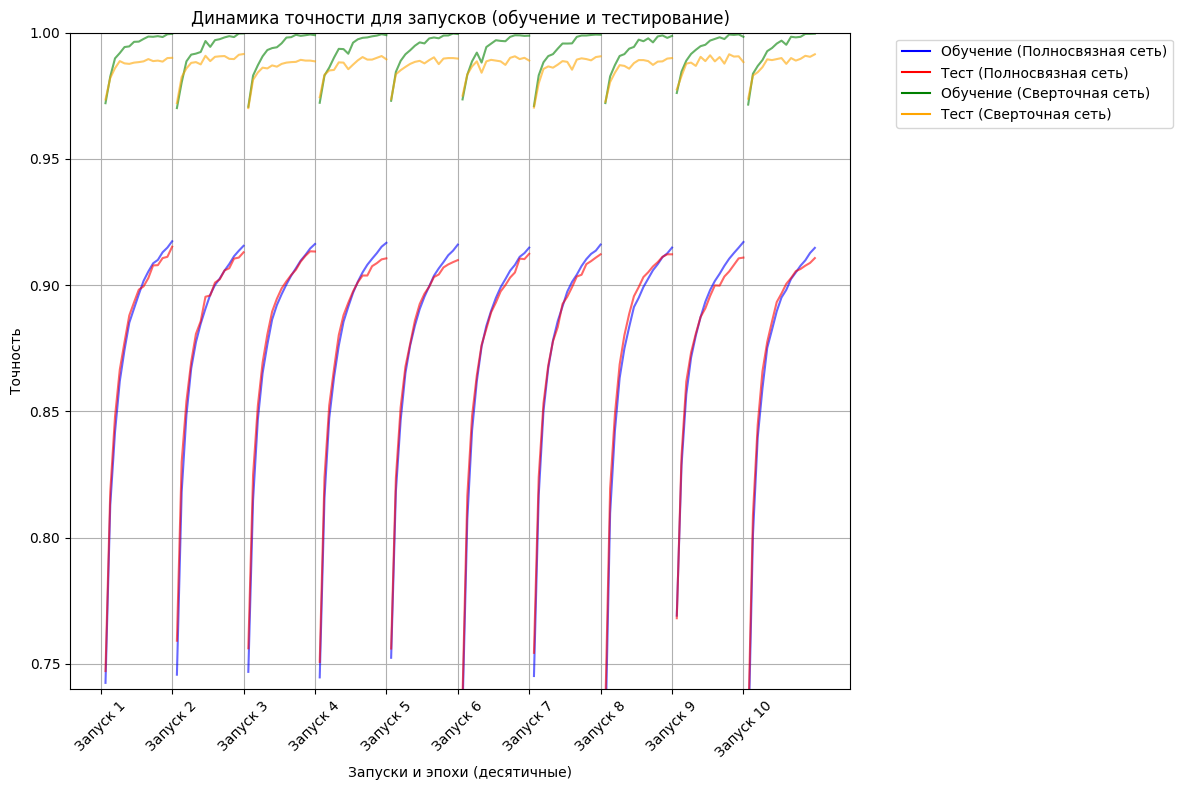

In [12]:
plt.figure(figsize=(12, 8))

# Полносвязная сеть
for run_idx, metrics in enumerate(fc_metrics):
    epochs = np.arange(1, len(metrics["test_accuracy_history"]) + 1)
    x_vals = run_idx + epochs / len(metrics["test_accuracy_history"])  # Смещение эпох внутри запуска
    plt.plot(x_vals, metrics["train_accuracy_history"], label=f"Обучение (запуск {run_idx + 1})", linestyle='-', alpha=0.6, color='blue')
    plt.plot(x_vals, metrics["test_accuracy_history"], label=f"Тест (запуск {run_idx + 1})", linestyle='-', alpha=0.6, color='red')

# Сверточная сеть
for run_idx, metrics in enumerate(lenet_metrics):
    epochs = np.arange(1, len(metrics["test_accuracy_history"]) + 1)
    x_vals = run_idx + epochs / len(metrics["test_accuracy_history"])  # Смещение эпох внутри запуска
    plt.plot(x_vals, metrics["train_accuracy_history"], label=f"Обучение (запуск {run_idx + 1})", linestyle='-', alpha=0.6, color='green')
    plt.plot(x_vals, metrics["test_accuracy_history"], label=f"Тест (запуск {run_idx + 1})", linestyle='-', alpha=0.6, color='orange')

import matplotlib.lines as mlines

plt.title("Динамика точности для запусков (обучение и тестирование)")
plt.xlabel("Запуски и эпохи (десятичные)")
plt.ylabel("Точность")
plt.ylim(0.74, 1.0)
plt.xticks(range(10), labels=[f"Запуск {i + 1}" for i in range(10)], rotation=45)
plt.grid(True)

train_fc = mlines.Line2D([], [], color='blue', linestyle='-', label='Обучение (Полносвязная сеть)')
test_fc = mlines.Line2D([], [], color='red', linestyle='-', label='Тест (Полносвязная сеть)')
train_lenet = mlines.Line2D([], [], color='green', linestyle='-', label='Обучение (Сверточная сеть)')
test_lenet = mlines.Line2D([], [], color='orange', linestyle='-', label='Тест (Сверточная сеть)')

# Добавляем созданные линии в легенду
plt.legend(handles=[train_fc, test_fc, train_lenet, test_lenet], loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()